In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import sys
import os

In [2]:
#choose the scenario you want to study
ScenarioStudied=3

# Load the Score Table for all configurations

In [3]:
path_data = os.path.join('../results_MassiveSearch1/')
dataset_csv = os.path.join(path_data, "concat_rewards.csv")
rewards = pd.read_csv(dataset_csv, sep=",",)

In [4]:
ncolumns=rewards.shape[1]
rewards.head()

,datetimes,scenario,rewards_1128,rewards_76,rewards_6748,rewards_1704,rewards_5866,rewards_1712,rewards_6410,rewards_7340,...,rewards_3524,rewards_6340,rewards_2928,rewards_3298,rewards_1952,rewards_5410,rewards_3650,rewards_842,rewards_233,rewards_3152
0,"01/11/2018, 00:05:00",0,13.505,11.830,10.671,10.914,12.633,9.296,14.274,9.764,...,11.944,10.912,11.884,11.770,14.485,11.720,11.810,14.765,14.276,9.147
1,"01/11/2018, 00:10:00",0,13.145,11.373,10.307,10.498,12.478,9.114,14.054,9.658,...,11.724,10.399,11.613,11.750,14.245,11.589,11.646,14.648,13.959,8.359
2,"01/11/2018, 00:15:00",0,13.522,11.859,10.764,10.942,12.815,9.484,14.198,9.998,...,12.012,10.932,12.051,11.932,14.640,11.813,11.976,14.842,14.397,8.918
3,"01/11/2018, 00:20:00",0,13.460,11.823,10.802,10.933,12.748,9.481,14.150,10.032,...,11.923,10.936,11.945,11.903,14.666,11.805,11.880,14.825,14.395,9.125
4,"01/11/2018, 00:25:00",0,13.906,12.304,11.150,11.410,13.161,9.974,14.637,10.376,...,12.443,11.515,12.333,12.135,14.747,12.119,12.090,15.041,14.467,9.077


In [5]:
ncolumns

2240

In [6]:
#plot=rewards.iloc[:,2:ncolumns].sum().plot.bar()

In [7]:
#plot the cumulated score for every configuration
plot2=rewards.iloc[:,2:ncolumns].sum().plot.hist()

## Reorder Reward DataFrame columns
All configurations did not converge during the computations: only about 2200 over 8500. 
Also they were computed in parallel so they are not ordered by their ID. That's what we do in the following.

In [8]:
columnNames=rewards.iloc[:,2:ncolumns].columns
columnIndexes=[int(str.split(name,'_')[1]) for name in columnNames]

iDXOrder=np.argsort(columnIndexes,)
newColumnNames=columnNames[iDXOrder]
newColumnNames=['datetimes','scenario']+list(newColumnNames)

In [9]:
rewards=rewards[newColumnNames]

In [10]:
sumRewardsConfig=rewards.iloc[:,2:ncolumns].sum()
idxHighRewards=np.where(sumRewardsConfig>=80000)

In [11]:
rewards

,datetimes,scenario,rewards_0,rewards_1,rewards_2,rewards_3,rewards_4,rewards_5,rewards_6,rewards_8,...,rewards_8544,rewards_8546,rewards_8548,rewards_8552,rewards_8560,rewards_8562,rewards_8564,rewards_8568,rewards_8592,rewards_8608
0,"01/11/2018, 00:05:00",0,14.600,14.814,14.454,14.664,11.126,10.741,10.469,15.082,...,12.505,12.504,11.379,9.954,10.805,11.555,10.861,9.518,11.661,10.010
1,"01/11/2018, 00:10:00",0,14.438,14.751,14.282,14.649,10.411,10.461,10.269,14.813,...,12.396,12.396,11.241,9.761,10.644,11.368,10.614,9.216,11.195,9.292
2,"01/11/2018, 00:15:00",0,14.837,15.084,14.688,14.950,11.164,10.854,10.606,15.243,...,12.724,12.721,11.588,10.156,10.829,11.648,10.910,9.560,11.666,9.866
3,"01/11/2018, 00:20:00",0,14.765,15.022,14.618,14.900,11.080,10.794,10.502,15.188,...,12.692,12.689,11.570,10.145,10.767,11.622,10.932,9.593,11.582,9.838
4,"01/11/2018, 00:25:00",0,14.984,15.173,14.862,15.045,11.749,11.177,10.853,15.437,...,13.090,13.087,11.983,10.574,11.302,12.045,11.328,9.996,12.019,10.556
5,"01/11/2018, 00:30:00",0,14.946,15.180,14.806,15.054,11.395,11.023,10.720,15.346,...,13.092,13.092,11.971,10.537,11.285,11.957,11.205,9.845,11.859,10.177
6,"01/11/2018, 00:35:00",0,15.243,15.477,15.111,15.366,11.668,11.243,10.927,15.605,...,13.219,13.214,12.114,10.696,11.271,11.999,11.259,9.915,12.051,10.374
7,"01/11/2018, 00:40:00",0,15.199,15.418,15.072,15.302,11.804,11.299,10.976,15.601,...,13.200,13.198,12.157,10.758,11.434,12.148,11.462,10.137,12.017,10.726
8,"01/11/2018, 00:45:00",0,15.158,15.411,15.027,15.311,11.577,11.192,10.872,15.499,...,13.195,13.199,12.119,10.751,11.375,12.056,11.301,10.029,11.935,10.382
9,"01/11/2018, 00:50:00",0,15.443,15.664,15.323,15.559,11.993,11.488,11.157,15.801,...,13.666,13.661,12.593,11.187,11.742,12.433,11.703,10.430,12.203,10.705


In [12]:
unique, counts = np.unique(rewards.iloc[:,2:ncolumns].idxmax(axis=1),return_counts=True)


In [13]:
print('here are the configurations which performed best at least once in the scenarios')
unique, counts 

here are the configurations which performed best at least once in the scenarios


(array(['rewards_1035', 'rewards_17', 'rewards_19', 'rewards_201',
        'rewards_209', 'rewards_211', 'rewards_217', 'rewards_219',
        'rewards_233', 'rewards_235', 'rewards_249', 'rewards_25',
        'rewards_250', 'rewards_251', 'rewards_2513', 'rewards_2515',
        'rewards_257', 'rewards_258', 'rewards_259', 'rewards_265',
        'rewards_266', 'rewards_267', 'rewards_27', 'rewards_281',
        'rewards_2952', 'rewards_3480', 'rewards_3496', 'rewards_41',
        'rewards_43', 'rewards_56', 'rewards_57', 'rewards_5776',
        'rewards_58', 'rewards_5816', 'rewards_5824', 'rewards_5832',
        'rewards_5848', 'rewards_585', 'rewards_587', 'rewards_59',
        'rewards_593', 'rewards_595', 'rewards_601', 'rewards_603',
        'rewards_617', 'rewards_619', 'rewards_624', 'rewards_626',
        'rewards_632', 'rewards_634', 'rewards_6386', 'rewards_6392',
        'rewards_6394', 'rewards_64', 'rewards_6400', 'rewards_6408',
        'rewards_6410', 'rewards_6418', 're

In [14]:
"rewards_5832" in unique

True

## Histogram of times a configuration performed best

In [15]:
%matplotlib inline
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.plotly as py
import plotly.graph_objs as go

# Connect Plotly in offline mode. 
init_notebook_mode(connected = True) 



data = [go.Bar(
        x=unique,
        y=counts
        )]

iplot(data)



In [16]:
sumRewardsConfig[72]

82416.3960000003

In [17]:
sumRewardsMAx=rewards.iloc[:,2:ncolumns].max(axis=1).sum()

In [18]:
print("maximum possible reward over scenarios if you pick up the best configuration at each time, meaning you can play any action at each timestep")
sumRewardsMAx

maximum possible reward over scenarios if you pick up the best configuration at each time, meaning you can play any action at each timestep


85095.522

In [19]:
#get the indices of the best configurations
iDXBest=np.argsort(-np.array(sumRewardsConfig))[0:50]
iDXBest

array([ 48, 282,   8,  49,  50,  51, 284,  10, 319, 321,  60,  54,  15,
       289, 296,  22, 147,  61, 314,  55, 335,  62,  56, 110, 275, 326,
       312, 298, 145,  63, 333, 291,  57, 328,  17,  24, 112, 146, 320,
       277, 322, 144, 281,  42,   7, 336,   1, 327, 334,  43])

# Load Table of Configuration description

In [20]:
path_data = os.path.join('../results_MassiveSearch1/')
actions_csv = os.path.join(path_data, "actions_table.csv")
actions = pd.read_csv(actions_csv, sep=",",)
actions=actions.drop(columns=['Unnamed: 0'])

In [21]:

actions.head()

,se_6,se_5,se_4,se_9,se_2,tl_4,tl_9,tl_17,tl_19
0,"[0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0]",0,0,0,0
1,"[0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0]",0,0,0,1
2,"[0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0]",0,0,1,0
3,"[0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0]",0,0,1,1
4,"[0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0]",0,1,0,0


In [22]:
actions.shape

(8640, 9)

Filter the "relevant actions": the ones for which we have a score in the score table

In [23]:
#filter to only relevant actions
convergentActions=columnIndexes
convergentActions=np.sort(columnIndexes)
#convergentActions=convergentActions[1:10]
actionsRelevant=actions.iloc[convergentActions]
actionsRelevant=actionsRelevant.reset_index(drop=True)

In [24]:
convergentActions

array([   0,    1,    2, ..., 8568, 8592, 8608])

In [25]:
actions.loc[convergentActions[iDXBest]]

,se_6,se_5,se_4,se_9,se_2,tl_4,tl_9,tl_17,tl_19
56,"[0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0]","[1, 0, 1, 0, 1]","[0, 0, 0, 0, 0, 0]",1,0,0,0
585,"[0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0]","[1, 0, 1, 0, 1, 1]","[0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0]",1,0,0,1
9,"[0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0]",1,0,0,1
57,"[0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0]","[1, 0, 1, 0, 1]","[0, 0, 0, 0, 0, 0]",1,0,0,1
58,"[0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0]","[1, 0, 1, 0, 1]","[0, 0, 0, 0, 0, 0]",1,0,1,0
59,"[0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0]","[1, 0, 1, 0, 1]","[0, 0, 0, 0, 0, 0]",1,0,1,1
587,"[0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0]","[1, 0, 1, 0, 1, 1]","[0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0]",1,0,1,1
11,"[0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0]",1,0,1,1
632,"[0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0]","[1, 0, 1, 0, 1, 1]","[1, 0, 1, 0, 1]","[0, 0, 0, 0, 0, 0]",1,0,0,0
634,"[0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0]","[1, 0, 1, 0, 1, 1]","[1, 0, 1, 0, 1]","[0, 0, 0, 0, 0, 0]",1,0,1,0


# Get Authorized Transitions
Since you are only allowed one action to switch to a new configuration, this limits the configuration you can reach and transition to, from one timestep to another.
Tha's this transition matrix we compute here

In [26]:
vectorReachableTopologies=[ [i] for i in range(actionsRelevant.shape[0]) ]

In [27]:
colmumnNames=np.array(actionsRelevant.columns)
#dfObj.duplicated(['Age', 'City'])

To find the configurations one action away at most from a given configuration, you delete one action column in the action table and you find the similar rows. Then you loop over all columns.

In [28]:
#on cherche les configurations qui sont a au plus une action de distance

for i in range(len(colmumnNames)):
    newCols=np.delete(colmumnNames,i)
    df=actionsRelevant[newCols]
    df = df[df.duplicated(keep=False)]
    df = np.array(df.groupby(df.columns.tolist()).apply(lambda x: tuple(x.index)).tolist())
    #print (df)

    for i in range(df.shape[0]):
        indices=np.array(df[i])
        for j in indices:
            #vectorReachableTopologies[j]=vectorReachableTopologies[j]+indices
            vectorReachableTopologies[j]=np.concatenate((vectorReachableTopologies[j],indices))

In [29]:
vectorReachableTopologies=[np.unique(vectorReachableTopologies[j]) for j in range(len(vectorReachableTopologies))]

In [30]:
vectorReachableTopologies

[array([   0,    1,    2,    4,    7,   14,   28,   42,   78,   90,  102,
         188,  274,  378,  473,  905, 1270, 1701]),
 array([  0,   1,   3,   5,   8,  15,  29,  43,  91, 103, 189, 275, 379,
        474, 906]),
 array([   0,    2,    3,    6,    9,   16,   30,   44,   79,  104,  190,
         276,  380,  475,  907, 1271, 1702]),
 array([  1,   2,   3,  10,  17,  31,  45, 105, 191, 277, 381, 476, 908]),
 array([   0,    4,    5,    6,   11,   18,   32,   46,  106,  192,  278,
         382,  477,  909, 1272, 1703]),
 array([  1,   4,   5,  12,  19,  33,  47, 107, 193, 279, 383, 478, 910]),
 array([  2,   4,   6,  13,  20,  34, 108, 194, 280, 384, 479, 911]),
 array([   0,    7,    8,    9,   11,   21,   35,   48,   80,   92,  109,
         195,  281,  385,  480,  912, 1273, 1704]),
 array([  1,   7,   8,  10,  12,  22,  36,  49,  93, 110, 196, 282, 386,
        481, 913]),
 array([   2,    7,    9,   10,   13,   23,   37,   50,   81,  111,  197,
         283,  387,  482,  914, 12

# Look at max rewards

In [31]:
rewards_scenario=rewards.loc[np.where(rewards['scenario']==ScenarioStudied)]

In [32]:
rewards_scenario

,datetimes,scenario,rewards_0,rewards_1,rewards_2,rewards_3,rewards_4,rewards_5,rewards_6,rewards_8,...,rewards_8544,rewards_8546,rewards_8548,rewards_8552,rewards_8560,rewards_8562,rewards_8564,rewards_8568,rewards_8592,rewards_8608
1437,"01/16/2018, 00:05:00",3,15.549,15.799,15.421,15.693,11.797,11.437,11.195,15.773,...,13.488,13.489,12.330,10.981,13.338,13.257,12.397,11.020,11.993,12.053
1438,"01/16/2018, 00:10:00",3,15.684,15.874,15.599,15.785,12.320,11.742,11.401,15.955,...,13.730,13.729,12.607,11.285,13.583,13.530,12.678,11.319,12.420,12.472
1439,"01/16/2018, 00:15:00",3,15.574,15.819,15.455,15.722,11.907,11.491,11.191,15.805,...,13.454,13.450,12.352,10.977,13.307,13.276,12.478,11.067,12.035,12.235
1440,"01/16/2018, 00:20:00",3,15.504,15.692,15.423,15.604,12.131,11.531,11.240,15.733,...,13.438,13.438,12.370,10.981,13.284,13.250,12.433,11.000,12.193,12.280
1441,"01/16/2018, 00:25:00",3,15.823,16.118,15.705,16.058,12.051,11.766,11.430,15.931,...,13.619,13.624,12.578,11.216,13.450,13.404,12.630,11.249,12.071,12.072
1442,"01/16/2018, 00:30:00",3,15.760,15.958,15.663,15.866,12.503,11.884,11.531,16.088,...,13.922,13.927,12.891,11.528,13.851,13.825,13.011,11.593,12.514,12.699
1443,"01/16/2018, 00:35:00",3,15.941,16.122,15.866,16.044,12.740,12.058,11.702,16.127,...,14.061,14.060,13.037,11.645,13.963,13.926,13.058,11.589,12.644,12.643
1444,"01/16/2018, 00:40:00",3,15.840,16.075,15.729,15.987,12.357,11.869,11.514,16.031,...,13.823,13.821,12.781,11.395,13.756,13.742,12.850,11.377,12.299,12.473
1445,"01/16/2018, 00:45:00",3,16.259,16.473,16.162,16.391,13.012,12.392,12.024,16.439,...,14.481,14.481,13.489,12.085,14.398,14.338,13.516,12.054,12.832,12.785
1446,"01/16/2018, 00:50:00",3,16.226,16.502,16.119,16.452,12.746,12.333,11.969,16.325,...,14.328,14.325,13.340,11.921,14.273,14.235,13.336,11.818,12.549,12.562


In [33]:
sumDoNothing=rewards_scenario['rewards_0'].sum()
sumDoNothing

13558.747

In [34]:
rewardsValues=rewards_scenario.iloc[:,2:ncolumns].values
rewardsValues

array([[15.549, 15.799, 15.421, ..., 11.02 , 11.993, 12.053],
       [15.684, 15.874, 15.599, ..., 11.319, 12.42 , 12.472],
       [15.574, 15.819, 15.455, ..., 11.067, 12.035, 12.235],
       ...,
       [15.425, 15.717, 15.285, ..., 10.649, 11.652, 11.54 ],
       [15.125, 15.419, 14.99 , ..., 10.296, 11.376, 11.373],
       [14.89 , 15.303, 14.853, ..., 10.364, 11.167, 11.236]])

# Create graph Edges
Over the length of a scenario, tou want to build a directed graph with every node being a configuration at some tiestep and every edge having the score of the configuration you are reaching.

In [35]:
#vectorReachableTopologies=vectorReachableTopologies[0:10]

You build the adjacency edge list for you graph
The source nodes are all the ones you can find in the score table with a timestep ID.
The target nodes are all the configuration you can reach from the source node with a timestep ID of +1

In [36]:
duration=int(rewards_scenario.shape[0]-1)
print("duration: "+ str(duration))

edgeNamesOr=[str(convergentActions[i])+'_' +str(int(t)) for t in range(duration) for i in range(len(vectorReachableTopologies)) 
             for j in vectorReachableTopologies[i] ]
edgeNamesEx=[str(convergentActions[j])+'_' +str(int(t+1)) for t in range(duration) for i in range(len(vectorReachableTopologies)) 
             for j in vectorReachableTopologies[i] ]
EdgeWeight=[rewardsValues[int(t+1),j] for t in range(duration) for i in range(len(vectorReachableTopologies)) 
             for j in vectorReachableTopologies[i] ]

duration: 862


You add an init node at the beginning of your graph and an 'end' node at the end to make one single connected graph with a global source node and global target node to then compute the best path between those

In [37]:
edgeNamesOrNodeSource=['init' for j in vectorReachableTopologies]
edgeNamesExNodeSource=[str(convergentActions[i])+'_' +str(0) for i in range(len(vectorReachableTopologies))]
EdgeWeightNodeSource=[rewardsValues[0,j] for j in range(len(vectorReachableTopologies))]

In [38]:
edgeNamesExNodeEnd=['end' for j in vectorReachableTopologies]
edgeNamesOrNodeEnd=[str(convergentActions[i])+'_' +str(int(duration)) for i in range(len(vectorReachableTopologies))]
EdgeWeightNodeEnd=[0.1 for j in vectorReachableTopologies]

In [39]:
edgeNamesOr=edgeNamesOrNodeSource+edgeNamesOr+edgeNamesOrNodeEnd
edgeNamesEx=edgeNamesExNodeSource+edgeNamesEx+edgeNamesExNodeEnd
EdgeWeight=EdgeWeightNodeSource+EdgeWeight+EdgeWeightNodeEnd

In [40]:
edgeDf=pd.DataFrame({'or':edgeNamesOr,'ex':edgeNamesEx,'weight':EdgeWeight})

In [41]:
edgeDf.head()

,or,ex,weight
0,init,0_0,15.549
1,init,1_0,15.799
2,init,2_0,15.421
3,init,3_0,15.693
4,init,4_0,11.797


In [42]:
np.where(edgeDf['or']=='1_2')

(array([60188, 60189, 60190, 60191, 60192, 60193, 60194, 60195, 60196,
        60197, 60198, 60199, 60200, 60201, 60202]),)

# Build the graph
You build a directed graph to compute then a longest path (not a shortest path!)

In [43]:
G=nx.from_pandas_edgelist(edgeDf, target='ex', source='or', edge_attr=['weight'],create_using=nx.DiGraph())

In [44]:
#G.edges()
#G.nodes()
#G.get_edge_data('8_0','8_1',default=0)

In [45]:
#G.nodes()

In [46]:
#sortedComps=sorted(nx.strongly_connected_components(G), key=len, reverse=True)

In [47]:
#len(sortedComps)

In [48]:
#nx.draw(G, with_labels = True)

## Get the shortest path for an acyclic directed graph

In [49]:
longestPath=nx.dag_longest_path(G)
longestPath

['init',
 '72_0',
 '72_1',
 '72_2',
 '72_3',
 '73_4',
 '72_5',
 '72_6',
 '64_7',
 '64_8',
 '65_9',
 '17_10',
 '17_11',
 '17_12',
 '17_13',
 '17_14',
 '17_15',
 '17_16',
 '17_17',
 '17_18',
 '17_19',
 '17_20',
 '17_21',
 '17_22',
 '17_23',
 '17_24',
 '17_25',
 '17_26',
 '17_27',
 '17_28',
 '209_29',
 '17_30',
 '17_31',
 '17_32',
 '209_33',
 '17_34',
 '17_35',
 '17_36',
 '17_37',
 '17_38',
 '17_39',
 '17_40',
 '17_41',
 '17_42',
 '17_43',
 '17_44',
 '17_45',
 '17_46',
 '17_47',
 '17_48',
 '17_49',
 '17_50',
 '17_51',
 '17_52',
 '17_53',
 '17_54',
 '17_55',
 '17_56',
 '17_57',
 '17_58',
 '17_59',
 '17_60',
 '17_61',
 '17_62',
 '17_63',
 '17_64',
 '17_65',
 '17_66',
 '17_67',
 '19_68',
 '595_69',
 '593_70',
 '593_71',
 '17_72',
 '17_73',
 '17_74',
 '17_75',
 '17_76',
 '17_77',
 '17_78',
 '65_79',
 '73_80',
 '72_81',
 '72_82',
 '73_83',
 '73_84',
 '73_85',
 '57_86',
 '73_87',
 '57_88',
 '73_89',
 '57_90',
 '73_91',
 '72_92',
 '73_93',
 '73_94',
 '73_95',
 '72_96',
 '73_97',
 '57_98',
 '57_9

In [50]:
#totalWeight=0
#for i in range(len(longestPath)-1):
#    sourceNode=longestPath[i]
#    targetNode=longestPath[i+1]
#    weight=G[sourceNode][targetNode]['weight']
#    print("new edge")
#    print(sourceNode)
#    print(targetNode)
#    print(weight)
#    totalWeight+=weight
#

Make an histogram of the most used configurations over the shortest path

In [51]:
configsShortest=['reward_'+str.split(name,'_')[0] for name in longestPath[1:-1]]

In [52]:
unique, counts = np.unique(configsShortest,return_counts=True)

In [53]:
unique

array(['reward_17', 'reward_19', 'reward_209', 'reward_25', 'reward_251',
       'reward_257', 'reward_259', 'reward_265', 'reward_267',
       'reward_56', 'reward_57', 'reward_5832', 'reward_59', 'reward_593',
       'reward_595', 'reward_601', 'reward_64', 'reward_65', 'reward_72',
       'reward_73', 'reward_74', 'reward_75'], dtype='<U11')

In [54]:
%matplotlib inline
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.plotly as py
import plotly.graph_objs as go

# Connect Plotly in offline mode. 
init_notebook_mode(connected = True) 



data = [go.Bar(
        x=unique,
        y=counts
        )]

iplot(data)



# Compare the cumulated scores for some baselines
- Do Nothing in Ref Topo
- Do Nothing in the best Topoes
- Best path with only one action at each timestep
- Best path with all actions possible

In [55]:
print('max reward by doin:')
nx.dag_longest_path_length(G)

max reward by doin:


14094.025000000003

In [56]:
sumDoNothinginRef=rewards_scenario[['rewards_0']].sum()
print('max reward by doing nothing in reference configuration:')
print(sumDoNothinginRef)


max reward by doing nothing in reference configuration:
rewards_0    13558.747
dtype: float64


In [57]:
sums=rewards_scenario.iloc[:,2:ncolumns].sum()
sumDoNothinginBest=sums.max()

print('max reward by doing nothing in a configuration:')
print(sums.argmax())
print(sumDoNothinginBest)

max reward by doing nothing in a configuration:
rewards_73
14065.772000000004


/home/marotant/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:


The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.



In [58]:
sumRewardsMAx=rewards_scenario.iloc[:,2:ncolumns].max(axis=1).sum()
print('max reward by doing the best configuration with all actions possible:')
sumRewardsMAx

max reward by doing the best configuration with all actions possible:


14097.968

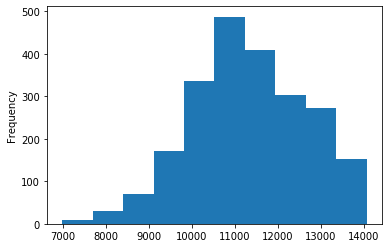

In [59]:
plot2=rewards_scenario.iloc[:,2:ncolumns].sum().plot.hist()

In [60]:
idxActions=[17,25,41,56,57,72,88,585,601,617,826,56,650]
actions.iloc[idxActions]

,se_6,se_5,se_4,se_9,se_2,tl_4,tl_9,tl_17,tl_19
17,"[0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0]","[1, 1, 0, 1, 0, 1]",0,0,0,1
25,"[0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0]","[1, 1, 0, 1, 0, 1]",1,0,0,1
41,"[0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0]","[1, 1, 0, 1, 0, 0]",1,0,0,1
56,"[0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0]","[1, 0, 1, 0, 1]","[0, 0, 0, 0, 0, 0]",1,0,0,0
57,"[0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0]","[1, 0, 1, 0, 1]","[0, 0, 0, 0, 0, 0]",1,0,0,1
72,"[0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0]","[1, 0, 1, 0, 1]","[1, 1, 0, 1, 0, 1]",1,0,0,0
88,"[0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0]","[1, 0, 1, 0, 1]","[1, 1, 0, 1, 0, 0]",1,0,0,0
585,"[0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0]","[1, 0, 1, 0, 1, 1]","[0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0]",1,0,0,1
601,"[0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0]","[1, 0, 1, 0, 1, 1]","[0, 0, 0, 0, 0]","[1, 1, 0, 1, 0, 1]",1,0,0,1
617,"[0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0]","[1, 0, 1, 0, 1, 1]","[0, 0, 0, 0, 0]","[1, 1, 0, 1, 0, 0]",1,0,0,1


In [61]:
actions.iloc[5832]

se_6     [0, 1, 0, 0, 1, 1]
se_5        [0, 0, 0, 0, 0]
se_4     [0, 0, 0, 0, 0, 0]
se_9        [1, 0, 1, 0, 1]
se_2     [1, 1, 0, 1, 0, 1]
tl_4                      1
tl_9                      0
tl_17                     0
tl_19                     0
Name: 5832, dtype: object